## Face Mask Detector


### Importing Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.3.0'

### Training and Test Set 

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 1254 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 120 images belonging to 2 classes.


### Convolution and Max Pooling 

In [5]:
cnn = tf.keras.models.Sequential()

#Convolution and Max Pooling Layer 1
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3])) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

#Convolution and Max Pooling Layer 2
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

### Flattening

In [6]:
cnn.add(tf.keras.layers.Flatten())

### Fully Connected Layer 

In [7]:
#Input Layer
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

#Output Layer
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

### Compilation

In [8]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Fitting the model 

In [9]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
40/40 [==============================] - 51s 1s/step - loss: 0.4609 - accuracy: 0.8078 - val_loss: 0.1756 - val_accuracy: 0.9250
Epoch 2/25
40/40 [==============================] - 13s 313ms/step - loss: 0.1514 - accuracy: 0.9458 - val_loss: 0.1268 - val_accuracy: 0.9667
Epoch 3/25
40/40 [==============================] - 13s 315ms/step - loss: 0.1016 - accuracy: 0.9625 - val_loss: 0.0505 - val_accuracy: 0.9833
Epoch 4/25
40/40 [==============================] - 12s 311ms/step - loss: 0.0830 - accuracy: 0.9745 - val_loss: 0.0417 - val_accuracy: 0.9833
Epoch 5/25
40/40 [==============================] - 12s 312ms/step - loss: 0.0754 - accuracy: 0.9777 - val_loss: 0.0441 - val_accuracy: 0.9917
Epoch 6/25
40/40 [==============================] - 13s 313ms/step - loss: 0.0628 - accuracy: 0.9825 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 7/25
40/40 [==============================] - 13s 315ms/step - loss: 0.0645 - accuracy: 0.9769 - val_loss: 0.0308 - val_accuracy: 0.9917
Ep

### Prediction 

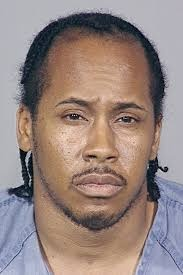

In [10]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/prediction/465.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'No mask'
else:
    prediction = 'with mask'

In [11]:
print(prediction)            

No mask


<div>
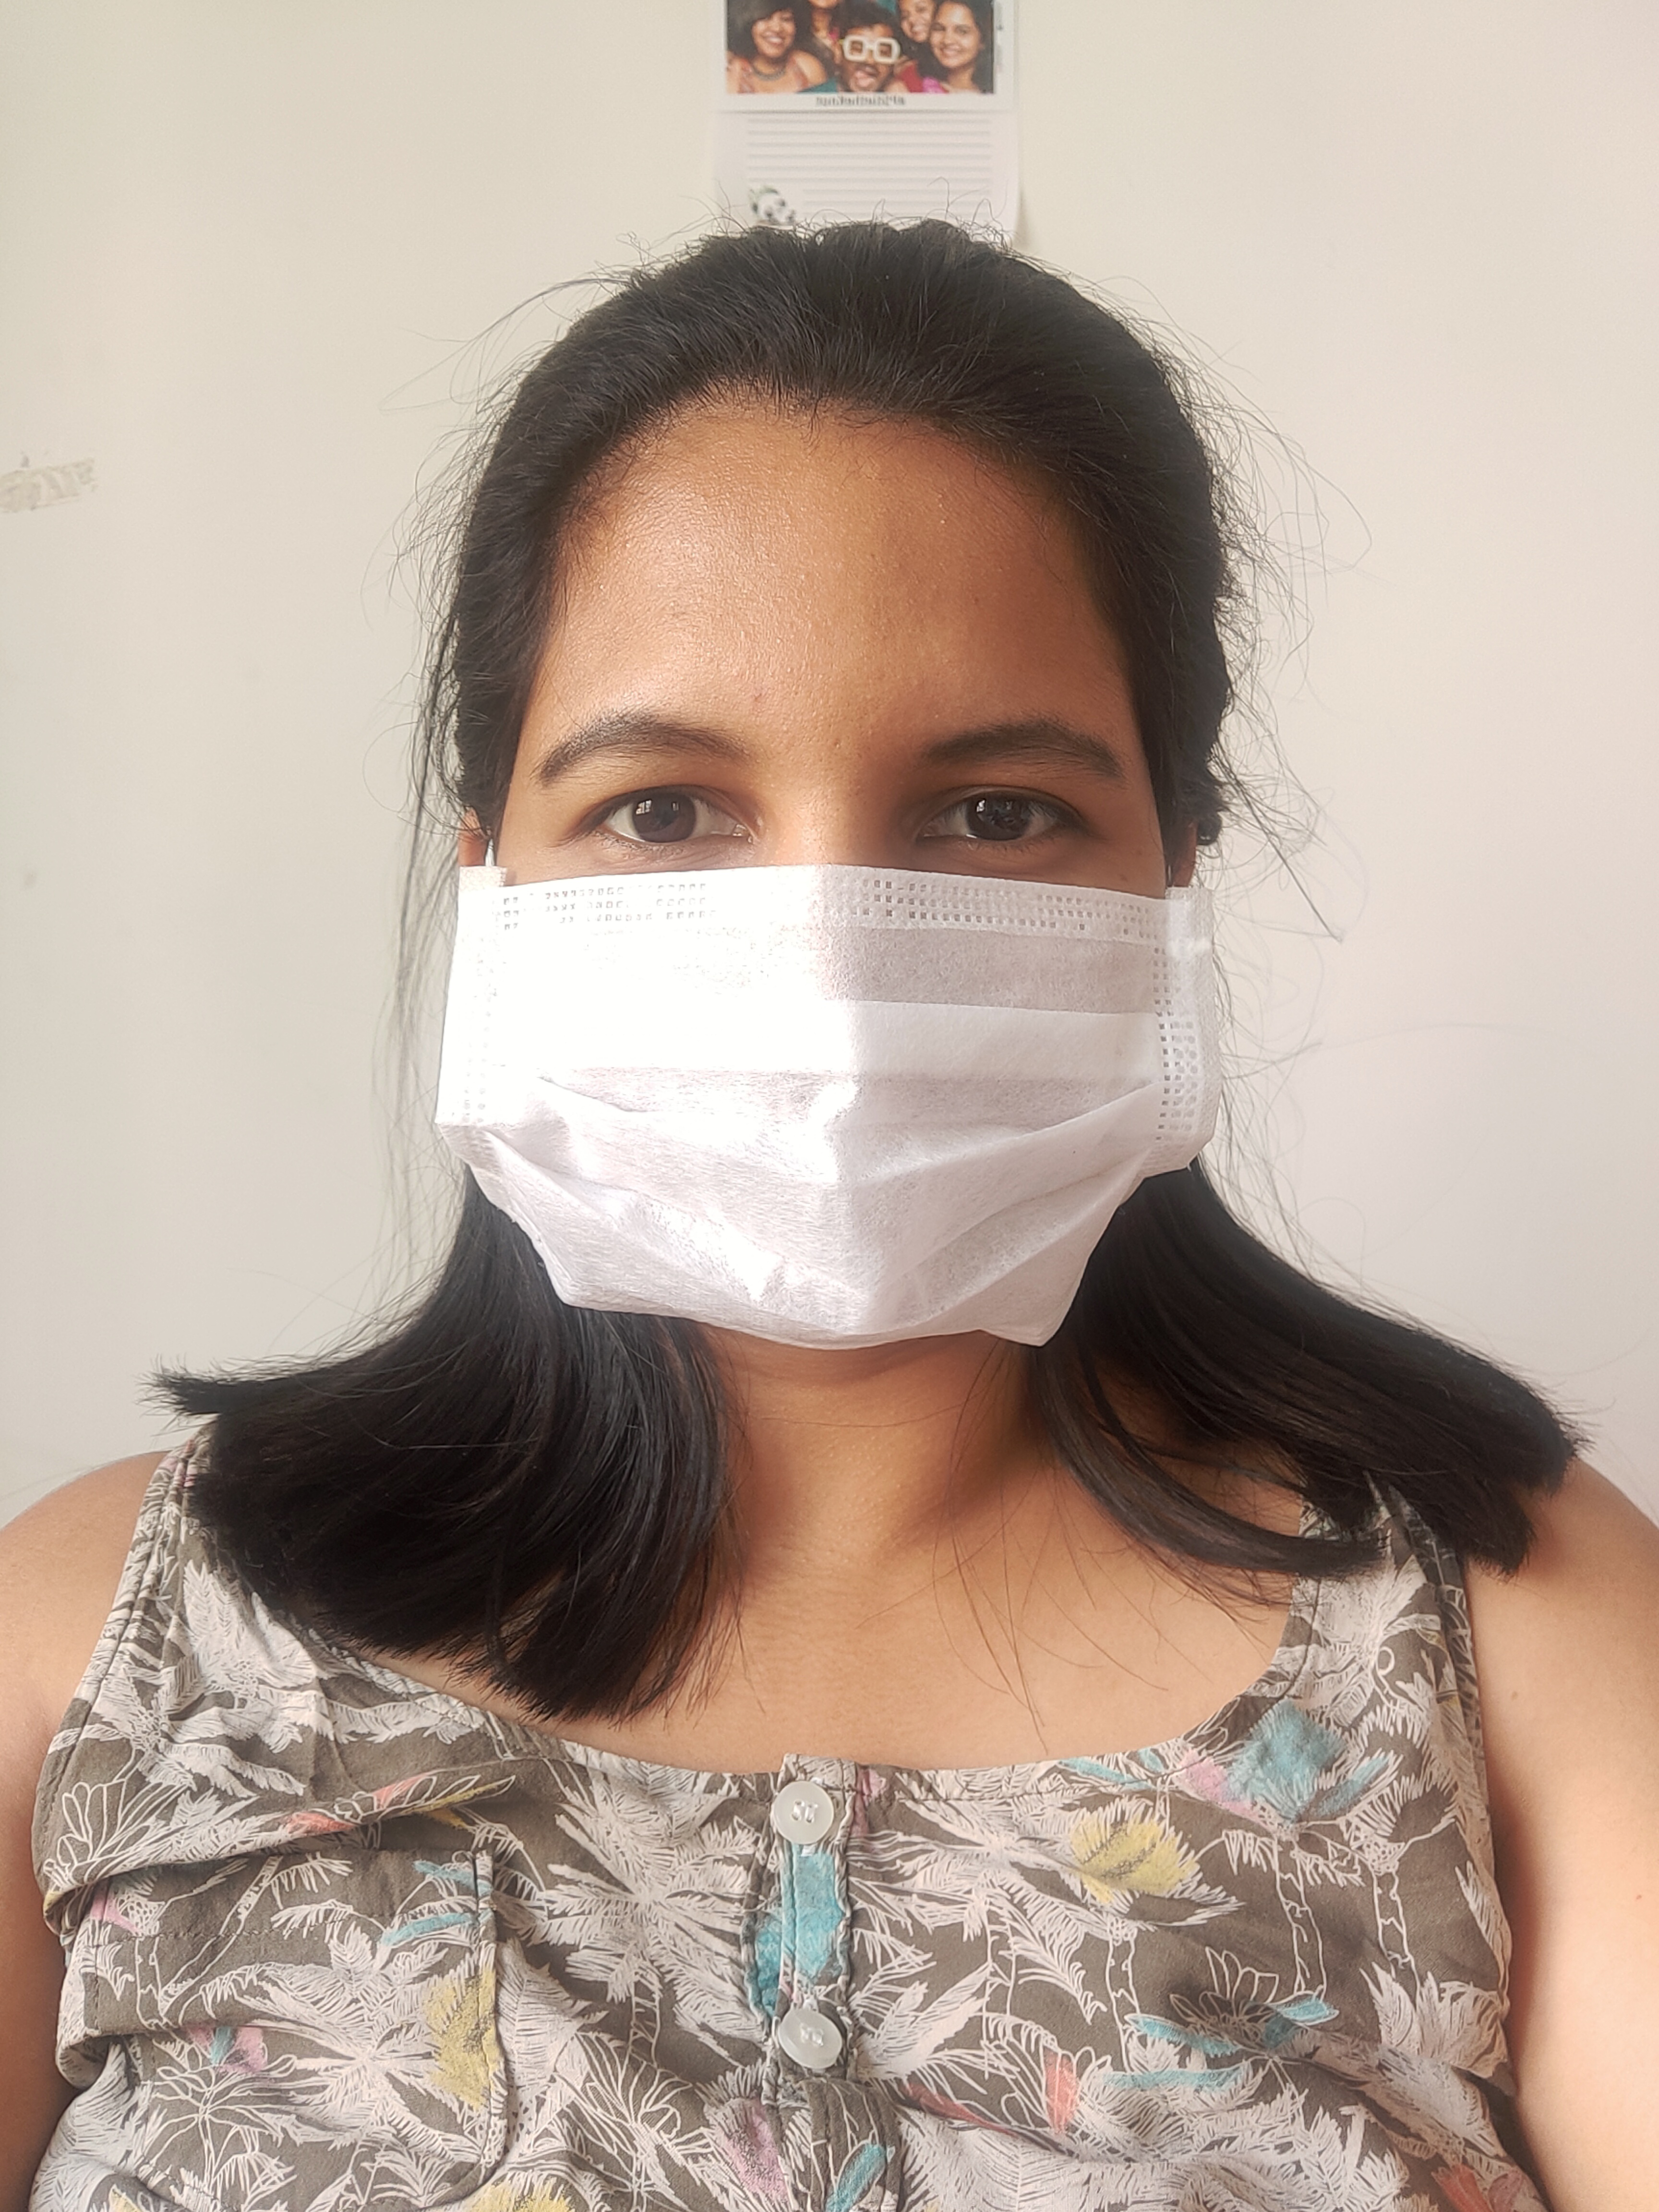
</div>

In [15]:
test_image = image.load_img('dataset/prediction/prajna.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'No mask'
else:
    prediction = 'with mask'

In [16]:
print(prediction)

with mask


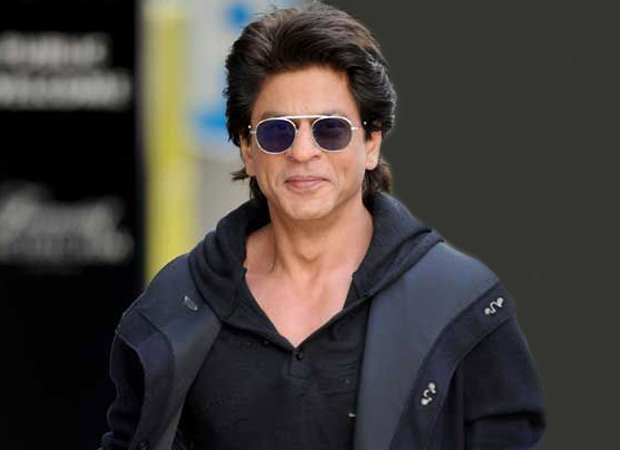

In [18]:
test_image = image.load_img('dataset/prediction/srk.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'No mask'
else:
    prediction = 'with mask'

In [19]:
print(prediction)

No mask


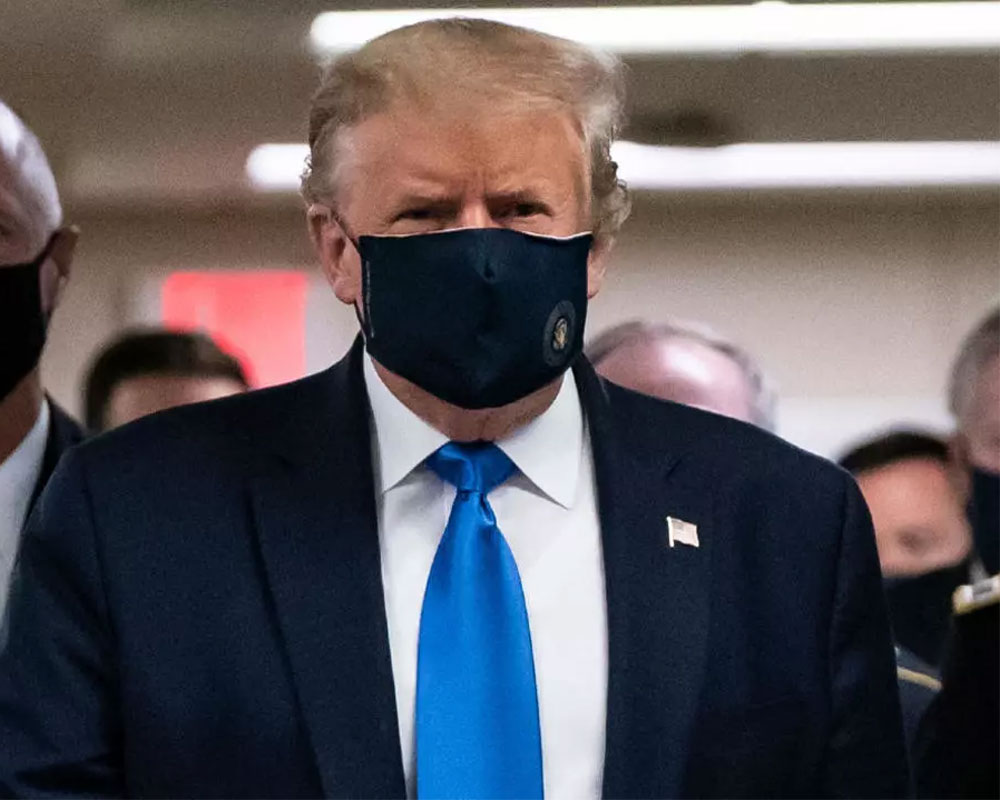

In [21]:
test_image = image.load_img('dataset/prediction/dtrump.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'No mask'
else:
    prediction = 'with mask'

In [22]:
print(prediction)

with mask
